In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl


In [44]:
df_bd_preprocesada = pd.read_csv('BD/OnlineRetail_Preprocesada.csv', sep=',', encoding = 'unicode_escape')
df_pivot = df_bd_preprocesada['InvoiceDate'].str.split(expand = True)
df_pivot.rename(columns = {0: 'Fecha', 1: 'Hora'}, inplace=True)
df_bd_preprocesada = df_bd_preprocesada.drop(columns =['Unnamed: 0','InvoiceDate'])
df_bd_preprocesada = pd.concat([df_bd_preprocesada,df_pivot], axis = 1)
df_bd_preprocesada['Monto'] = df_bd_preprocesada['UnitPrice'] * df_bd_preprocesada['Quantity']


In [45]:
df_bd_aux=df_bd_preprocesada_new.drop(['StockCode','Description','Country','Fecha','Hora'],axis=1)
df_bd_Normalizada = (df_bd_aux-df_bd_aux.min())/(df_bd_aux.max()-df_bd_aux.min())
df_bd_Normalizada.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Monto,Ingresos,KMeans_Clusters
count,392729.000000,392729.000000,392729.000000,392729.000000,392729.000000,392729.000000,392729.000000
mean,0.535713,0.002444,0.000384,0.495075,0.000565,0.000565,0.476694
std,0.289396,0.008978,0.002731,0.288479,0.002483,0.002483,0.356493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.284574,0.000208,0.000154,0.270707,0.000127,0.000127,0.333333
50%,0.564084,0.001042,0.000239,0.471886,0.000318,0.000318,0.333333
75%,0.789350,0.002292,0.000461,0.748148,0.000508,0.000508,0.666667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(df_bd_Normalizada)
    wcss.append(kmeans.inertia_)

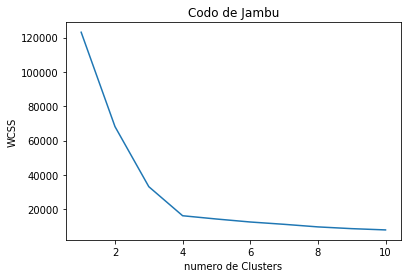

In [29]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("numero de Clusters")
plt.ylabel("WCSS")
plt.show()

In [50]:
from sklearn.decomposition import PCA #analisis de componentes principales
pca = PCA(n_components=2)
pca.fit(df_bd_Normalizada)
X_reduced = pca.transform(df_bd_Normalizada)
print("Reduced dataset shape:", X_reduced.shape)


Reduced dataset shape: (392729, 2)


In [51]:
clustering = KMeans(n_clusters = 4, max_iter=300)
clustering.fit(df_bd_Normalizada)
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_

In [52]:
centroides = clustering.cluster_centers_
etiquetas = clustering.labels_

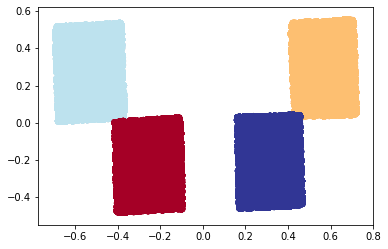

In [56]:
y_pred = clustering.predict(df_bd_Normalizada)


pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred,
           cmap='RdYlBu'); 
